In [1]:
import sys
import struct
import ctypes
import numpy as np

from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import ctypes
import time

%matplotlib notebook

class pointStruct(ctypes.Structure):
    _fields_ = [('lineCount', ctypes.c_int),
                ('allDataPointsCount', ctypes.c_int),
                ('pointCounts', ctypes.POINTER(ctypes.c_int)),
                ('xValues', ctypes.POINTER(ctypes.c_double)),
                ('yValues', ctypes.POINTER(ctypes.c_double)),
                ('zValues', ctypes.POINTER(ctypes.c_double))]
  


mydll = ctypes.cdll.LoadLibrary(r"D:\0nastia\RelativicHeavyBall\x64\Debug\testPythonDLL.dll")

f = mydll.logisticRegressionTarget
mydll.logisticRegressionTarget.restype = ctypes.c_double
mydll.logisticRegressionTarget.argtypes = [ctypes.c_double, ctypes.c_double]

testFunc = mydll.logisticRegressionMulty
mydll.logisticRegressionMulty.restype = ctypes.POINTER(pointStruct)
mydll.logisticRegressionMulty.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_int, ctypes.c_double, ctypes.c_double, ctypes.c_double, ctypes.c_double] 

print(time.strftime('%X %x %Z'))

ret = testFunc(0, 0, 0, 0, 1000, 0.0001, 1, 0.01, 6.3)

print(time.strftime('%X %x %Z'))

array_pointer = ctypes.cast(ret.contents.pointCounts, ctypes.POINTER(ctypes.c_int * ret.contents.lineCount))
pointCounts = np.frombuffer(array_pointer.contents, dtype = ctypes.c_int)

array_pointer = ctypes.cast(ret.contents.xValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
xValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.yValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
yValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(ret.contents.zValues, ctypes.POINTER(ctypes.c_double * ret.contents.allDataPointsCount))
zValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(ret.contents.lineCount)
print(ret.contents.allDataPointsCount)
print(pointCounts)
print(xValues)
print(yValues)
print(zValues)

class logisticRegressionData(ctypes.Structure):
    _fields_ = [('negativePointCount', ctypes.c_int),
                ('negativePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('negativePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('positivePointCount', ctypes.c_int),
                ('positivePointXValues', ctypes.POINTER(ctypes.c_double)),
                ('positivePointYValues', ctypes.POINTER(ctypes.c_double)),
                
                ('lineCount', ctypes.c_int),
                ('lineAParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineBParameters', ctypes.POINTER(ctypes.c_double)),
                ('lineCParameters', ctypes.POINTER(ctypes.c_double))]
    
getLogisticRegressionData = mydll.getLogisticRegressionData
mydll.getLogisticRegressionData.restype = ctypes.POINTER(logisticRegressionData)
mydll.getLogisticRegressionData.argtypes = []

data = getLogisticRegressionData()

array_pointer = ctypes.cast(data.contents.negativePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.negativePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.negativePointCount))
negativePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.positivePointXValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointXValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.positivePointYValues, ctypes.POINTER(ctypes.c_double * data.contents.positivePointCount))
positivePointYValues = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

array_pointer = ctypes.cast(data.contents.lineAParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineAParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineBParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineBParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)
array_pointer = ctypes.cast(data.contents.lineCParameters, ctypes.POINTER(ctypes.c_double * data.contents.lineCount))
lineCParameters = np.frombuffer(array_pointer.contents, dtype = ctypes.c_double)

print(negativePointXValues)
print(negativePointYValues)
print(positivePointXValues)
print(positivePointYValues)
print(lineAParameters)
print(lineBParameters)
print(lineCParameters)

00:19:40 06/13/20 FLE Daylight Time
00:24:38 06/13/20 FLE Daylight Time
4
4012
[1003 1003 1003 1003]
[0.00000000e+00 4.31481692e-04 8.60196064e-04 ... 1.55748246e+01
 1.55829484e+01 1.55910722e+01]
[ 0.00000000e+00 -8.61377740e-04 -1.71240337e-03 ... -4.56776106e+01
 -4.57246442e+01 -4.57716777e+01]
[  173.28679514   172.95678617   172.63352407 ... 25265.85447572
 25291.15912169 25316.46380775]
[1.92012355 3.08386774 2.09425028 3.40140542 5.20944034 2.3302438
 2.41744947 1.01173825 2.54811369 0.96970525 2.52409464 3.75115586
 3.64564177 1.5402825  4.18598878 2.33721407 2.2201764  2.33002108
 2.68808447 2.36550545 2.74989366 3.13602156 2.18438879 2.72172266
 2.4214043  2.25263148 3.52887496 1.36548826 2.86471729 2.78665634
 3.49955177 3.02987015 4.22668595 3.71186075 4.69272005 3.40974018
 3.48179519 3.51545788 3.1421214  2.71094917 1.76799302 3.90068264
 3.619682   3.26227233 2.07888209 3.12626666 3.0066012  1.74964068
 4.99207128 1.63030275 2.63061706 2.60501184 3.02068613 1.36627809


In [2]:
print(xValues[1900:2006])

[10.56637958 10.63598184 10.70500986 10.77347246 10.84138717 10.90878507
 10.97572472 11.04233819 11.10902587 11.17654656 11.24457593 11.31247266
 11.38002615 11.44716146 11.51385426 11.58011018 11.64596692 11.71152501
 11.77709695 11.84358236 11.9107589  11.97772188 12.04423322 12.1102174
 12.17564335 12.24049729 12.30477382 12.36847236 12.43159558 12.49414872
 12.55613961 12.61757924 12.67848344 12.73887694 12.79880495 12.85837764
 12.91808325 12.97891045 13.0399058  13.10053623 13.16069101 13.22033121
 13.27944005 13.3380101  13.39603866 13.4535257  13.51047285 13.56688283
 13.62275916 13.67810595 13.73292778 13.78722969 13.84101713 13.89429601
 13.94707282 13.99935481 14.05115032 14.10246942 14.15332515 14.20373621
 14.25373394 14.30338418 14.35286497 14.4024085  14.45184692 14.50096842
 14.54969956 14.59801225 14.64589451 14.69334145 14.74035184 14.78692668
 14.83306841 14.87878063 14.92406796 14.96893616 15.01339247 15.05744638
 15.10111148 15.14440999 15.18738694 15.23016442 15.

<IPython.core.display.Javascript object>


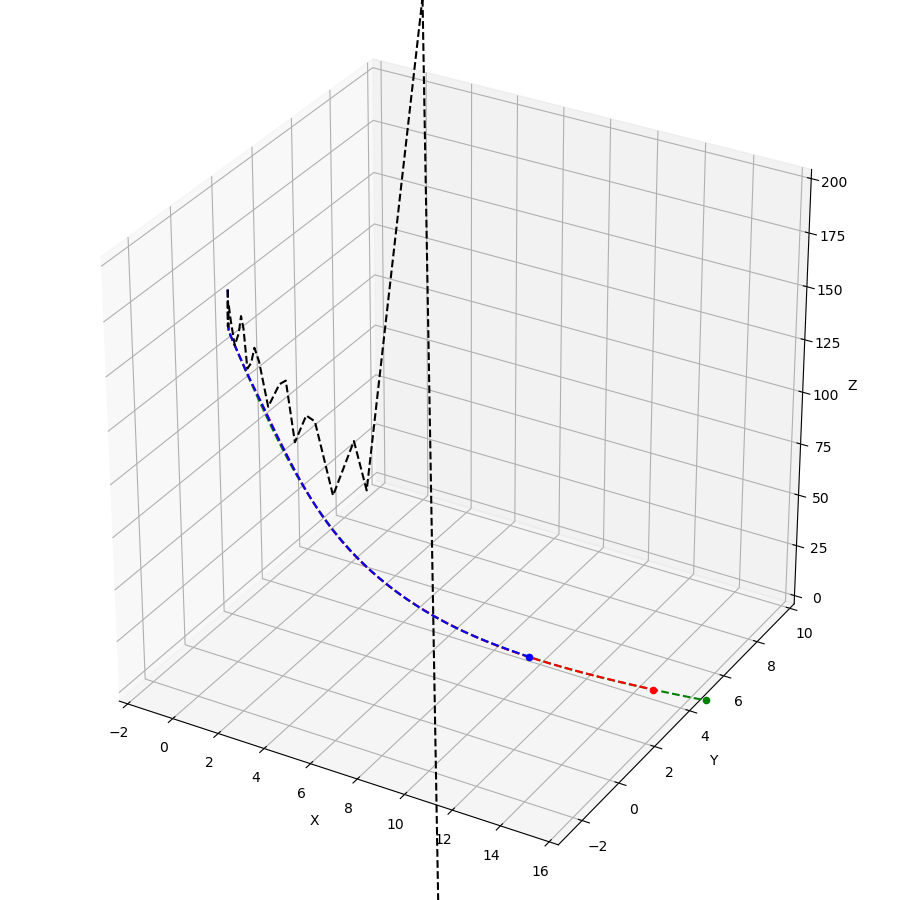

In [3]:
fig = plt.figure(figsize = (9, 9)) 
axe = p3.Axes3D(fig)

def gen1(n):
    for i in range(n):
        yield np.array([xValues[i], yValues[i], zValues[i]])
        
def gen2(n):
    for i in range(n):
        a = pointCounts[0]
        yield np.array([xValues[a + i], yValues[a + i], zValues[a + i]])
        
def gen3(n):
    for i in range(n):
        a = pointCounts[0] + pointCounts[1]
        yield np.array([xValues[a + i], yValues[a + i], zValues[a + i]])
        
def gen4(n):
    for i in range(n):
        a = pointCounts[0] + pointCounts[1] + pointCounts[2]
        yield np.array([xValues[a + i], yValues[a + i], zValues[a + i]])
        
def animate(num, data, line):
    line.set_data(data[:2, :num])
    line.set_3d_properties(data[2, :num])

n1 = pointCounts[0]
data1 = np.array(list(gen1(n1))).T
line1, = axe.plot(data1[0, 0:1], data1[1, 0:1], data1[2, 0:1], 'g--')

n2 = pointCounts[1]
data2 = np.array(list(gen2(n2))).T
line2, = axe.plot(data2[0, 0:1], data2[1, 0:1], data2[2, 0:1], 'r--')

n3 = pointCounts[2]
data3 = np.array(list(gen3(n3))).T
line3, = axe.plot(data3[0, 0:1], data3[1, 0:1], data3[2, 0:1], 'b--')

n4 = pointCounts[3]
data4 = np.array(list(gen4(n4))).T
line4, = axe.plot(data4[0, 0:1], data4[1, 0:1], data4[2, 0:1], 'k--')

nx = 100
ny = 100
ax = -2.
bx = 16.0
ay = -3.0
by = 10.0

axe.set_xlim3d([ax, bx])
axe.set_xlabel('X')

axe.set_ylim3d([ay, by])
axe.set_ylabel('Y')

axe.set_zlim3d([0.0, 200])
axe.set_zlabel('Z')

colors = ['g', 'r', 'b', 'k']
s = 0
for x in range(ret.contents.lineCount):
    s += pointCounts[x]
    axe.scatter3D(xValues[s - 1], yValues[s - 1], zValues[s - 1], color = colors[x])

ani1 = animation.FuncAnimation(fig, animate, n1, fargs=(data1, line1), interval=1, blit=False, repeat=False)
ani2 = animation.FuncAnimation(fig, animate, n2, fargs=(data2, line2), interval=1, blit=False, repeat=False)
ani3 = animation.FuncAnimation(fig, animate, n3, fargs=(data3, line3), interval=1, blit=False, repeat=False)
ani4 = animation.FuncAnimation(fig, animate, n4, fargs=(data4, line4), interval=1, blit=False, repeat=False)

plt.show();

<IPython.core.display.Javascript object>


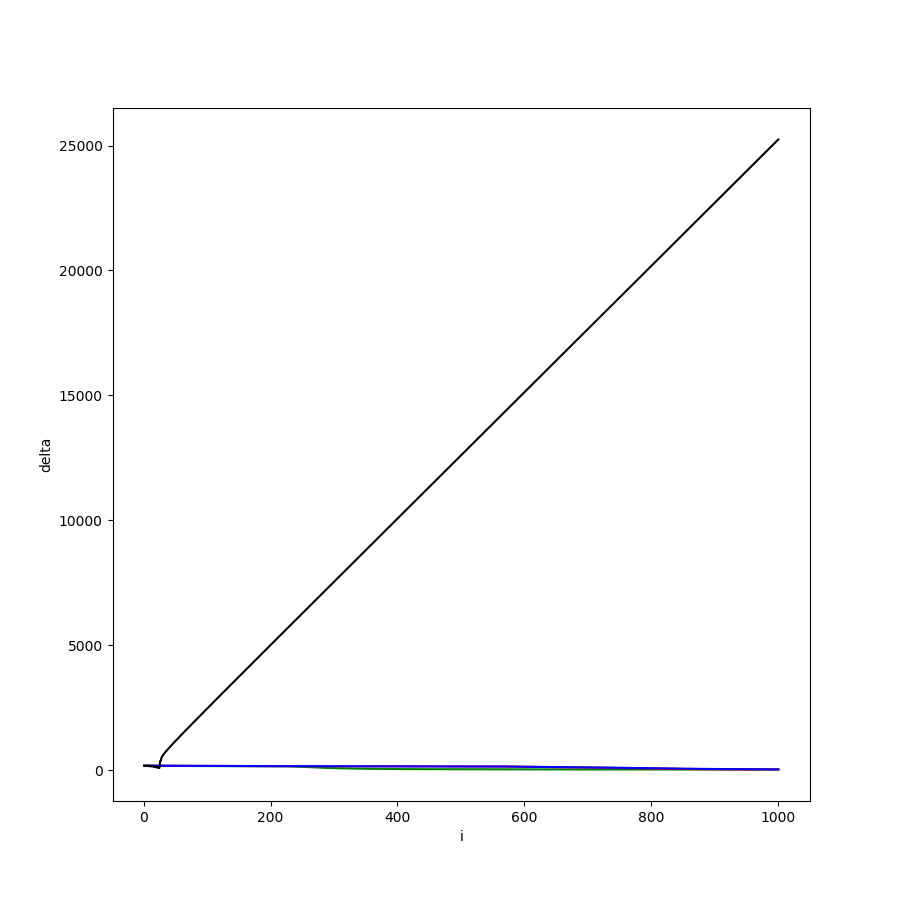

In [4]:
fig = plt.figure(figsize = (9, 9)) 

count = pointCounts[0]
iterations = [i+1 for i in range(count)]

a = 0

for x in range(ret.contents.lineCount):     
    sh=0
    sz=1000 - sh
    plt.plot(iterations[sh:sh + sz], zValues[a + sh:a+sh + sz], color = colors[x])
    a += pointCounts[x]

plt.ylabel('delta')
plt.xlabel('i')
plt.show()

<IPython.core.display.Javascript object>


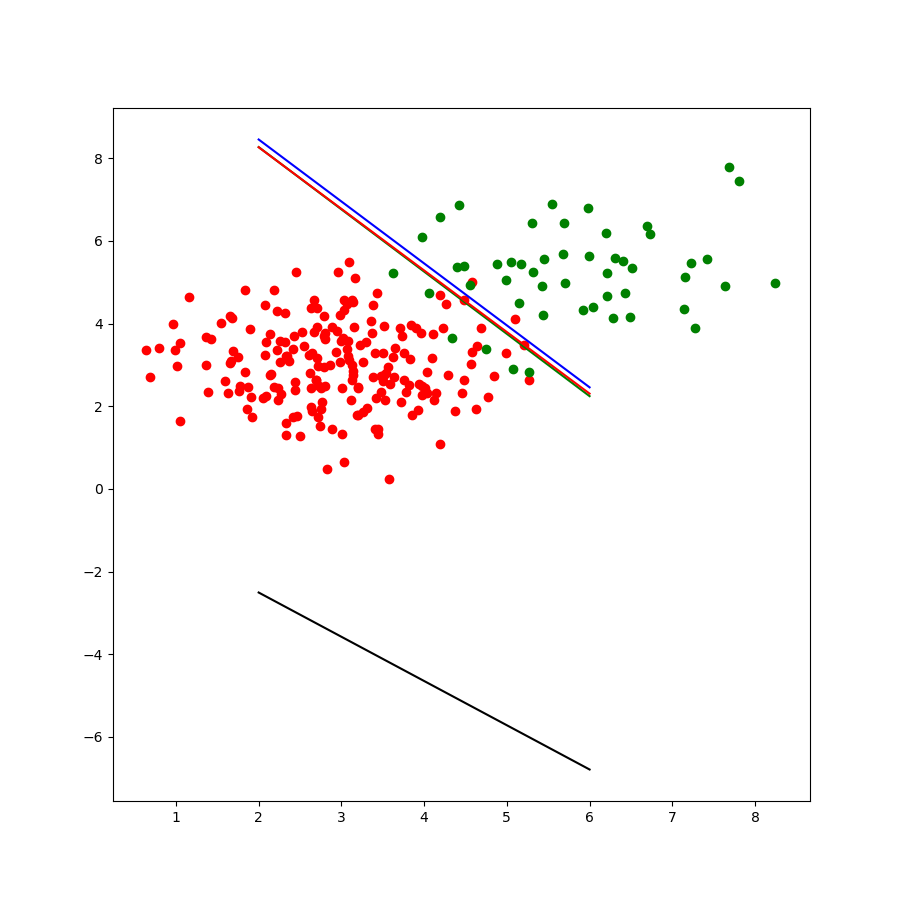

[8.27048113363118, 8.14750257274138, 8.024524011851584, 7.901545450961786, 7.778566890071988, 7.655588329182192, 7.532609768292392, 7.4096312074025965, 7.286652646512798, 7.163674085623, 7.040695524733203, 6.917716963843405, 6.794738402953606, 6.67175984206381, 6.548781281174011, 6.425802720284215, 6.302824159394416, 6.1798455985046195, 6.056867037614821, 5.9338884767250235, 5.810909915835226, 5.687931354945428, 5.56495279405563, 5.4419742331658325, 5.318995672276035, 5.1960171113862375, 5.07303855049644, 4.9500599896066415, 4.827081428716845, 4.704102867827046, 4.58112430693725, 4.458145746047451, 4.335167185157654, 4.2121886242678555, 4.089210063378059, 3.9662315024882604, 3.843252941598463, 3.7202743807086645, 3.5972958198188674, 3.4743172589290707, 3.3513386980392714, 3.228360137149475, 3.1053815762596764, 2.9824030153698793, 2.8594244544800818, 2.7364458935902842, 2.613467332700486, 2.4904887718106883, 2.36751021092089, 2.2445316500310923]


In [5]:
fig = plt.figure(figsize = (9, 9)) 

n=50

x = np.linspace(2., 6., n)

def f1(i):
    return (-lineAParameters[0]*x[i]+lineCParameters[0])/lineBParameters[0]
def f2(i):
    return (-lineAParameters[1]*x[i]+lineCParameters[1])/lineBParameters[1]
def f3(i):
    return (-lineAParameters[2]*x[i]+lineCParameters[2])/lineBParameters[2]
def f4(i):
    return (-lineAParameters[3]*x[i]+lineCParameters[3])/lineBParameters[3]


y1 = [f1(i) for i in range(n)]
y2 = [f2(i) for i in range(n)]
y3 = [f3(i) for i in range(n)]
y4 = [f4(i) for i in range(n)]

print(y1)

plt.plot(x, y1, color='g')
plt.plot(x, y2, color='r')
plt.plot(x, y3, color='b')
plt.plot(x, y4, color='k')

for j in range(data.contents.negativePointCount):
    plt.scatter(negativePointXValues[j], negativePointYValues[j], color = 'r')
    
for j in range(data.contents.positivePointCount):
    plt.scatter(positivePointXValues[j], positivePointYValues[j], color = 'g')